# Inspecting maps

We describe how to read and display the Planck CIB maps presented in Lenz, Doré, Lagache (2019).

In [1]:
# %load /Users/dlenz/.jupyter/startup.py
# Standard magic commands
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Adjust this as needed
datapath = Path('../dataverse_files')

# Basic example

In [3]:
cib_fullmission_353 = hp.read_map(
    datapath.joinpath('545/2.5e+20_gp20/cib_fullmission.hpx.fits').as_posix(),
    verbose=False)

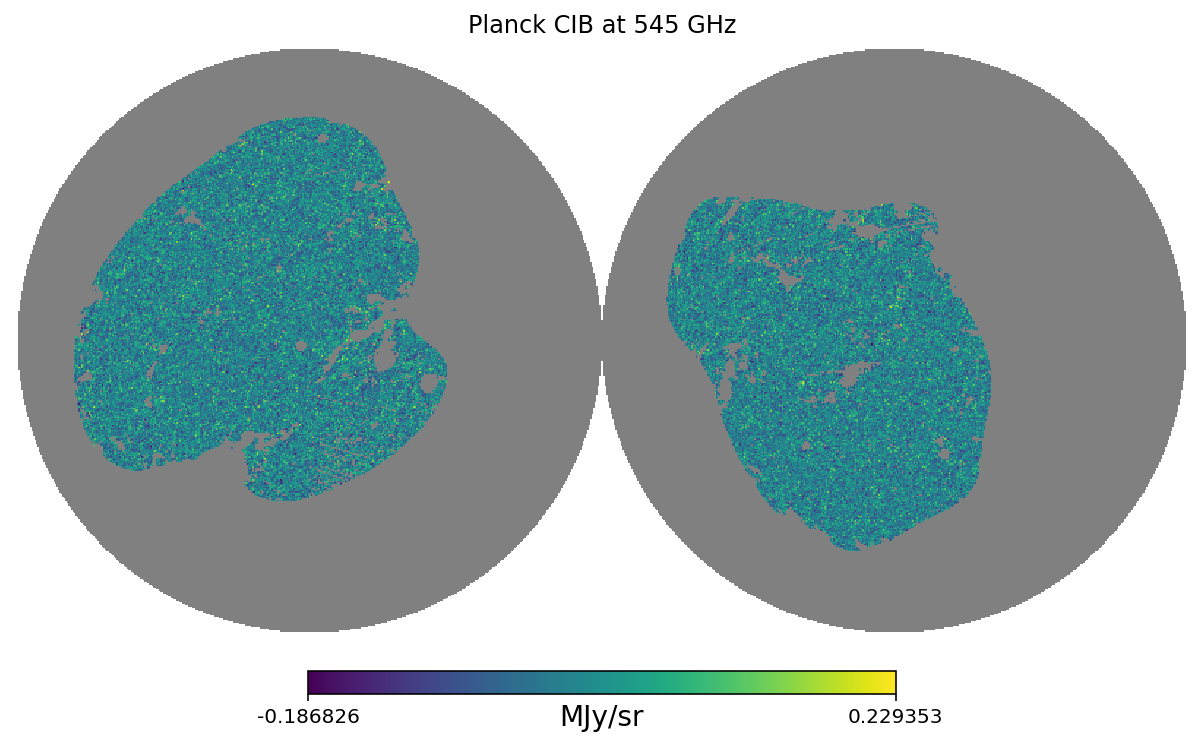

In [4]:
hp.orthview(cib_fullmission_353, rot=[0, 90], unit='MJy/sr', title='Planck CIB at 545 GHz')

Note that we mask invalid values as ``np.nan``. The mask is already available separately, as shown below.

# The masks

In [5]:
mask_bool = hp.read_map(
    datapath.joinpath('545/2.5e+20_gp20/mask_bool.hpx.fits').as_posix(),
    verbose=False,
    dtype=bool)

mask_apod = hp.read_map(
    datapath.joinpath('545/2.5e+20_gp20/mask_apod.hpx.fits').as_posix(),
    verbose=False,
)

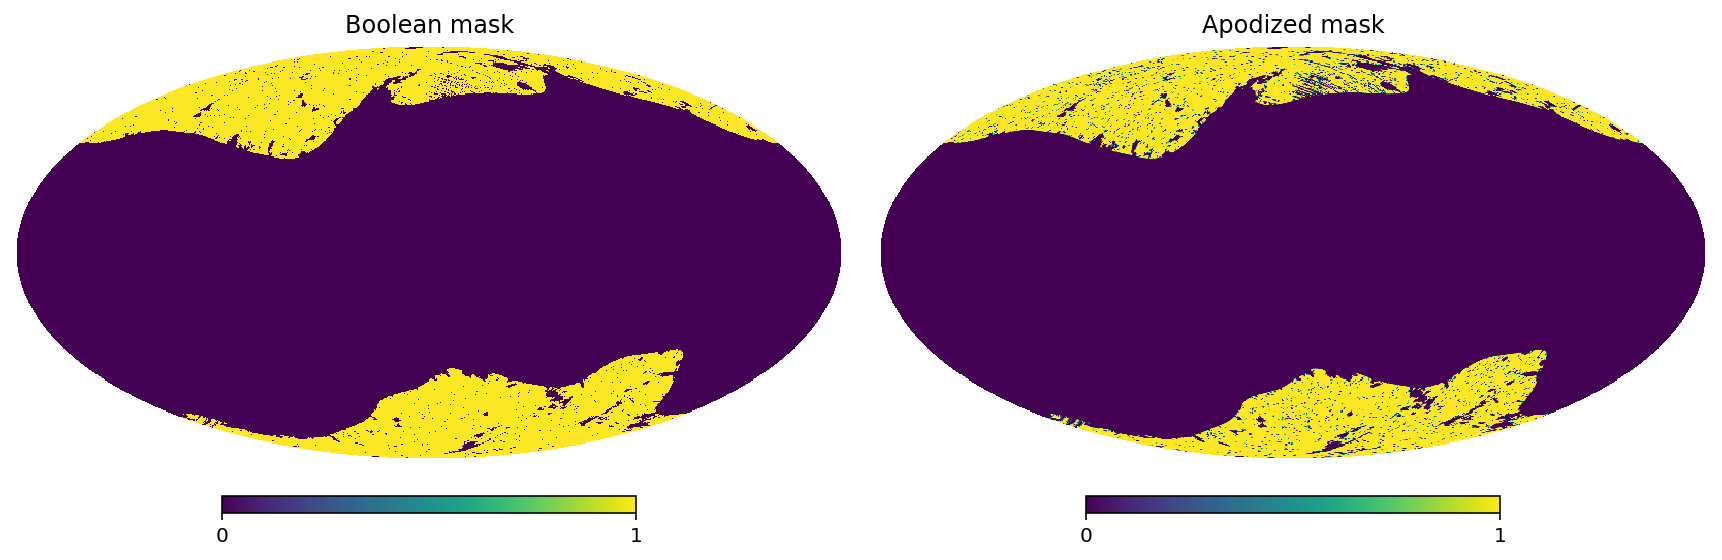

In [6]:
fig = plt.figure(figsize=(12, 5))
hp.mollview(mask_bool, sub=121, title='Boolean mask')
hp.mollview(mask_apod, sub=122, title='Apodized mask')

# Different sky fractions

In [7]:
fskys = [
    '2.5e+20_gp20'
]

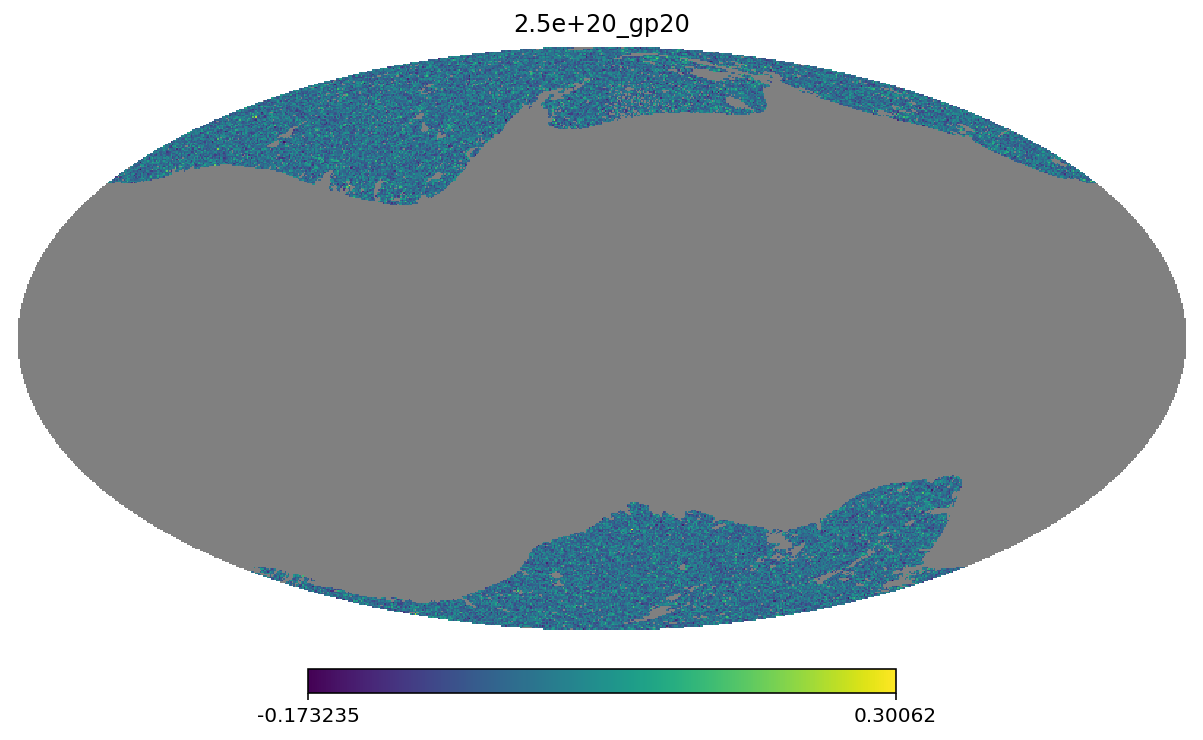

In [8]:
for fsky in fskys:
    d = hp.read_map(
        datapath.joinpath(f'545/{fsky}/cib_fullmission.hpx.fits').as_posix(),
        verbose=False)
    hp.mollview(d, title=fsky)